<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# <span style="color:#EF7C8E">HR Based ML Project, Employee Resign Prediction</span>
### <span style="color:#726060"> Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
import random
from sklearn.model_selection import train_test_split
from functools import reduce
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1 = pd.read_csv('data/general_data.csv')
df2 = pd.read_csv('data/employee_survey_data.csv')
df3 = pd.read_csv('data/manager_survey_data.csv')


In [3]:
# -------------------------------------- join datasets -------------------------------- #

# list with dataset we want to join
data_frames = [df1, df2, df3]

#merge dataset by 'EmplyeeID'
df = reduce(lambda left,right: pd.merge(left,right,on=['EmployeeID'],
                                            how='outer'), data_frames)

In [4]:
# view the data set
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
df.shape

(4410, 29)

Text(0.5, 0, 'Number of Peopel')

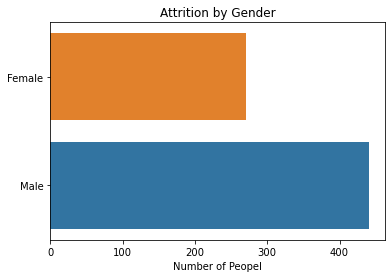

In [6]:
# filtering the data
attrition = df[df['Attrition'] == 'Yes']

index = attrition['Gender'].value_counts().index
values = attrition['Gender'].value_counts().values

sns.barplot(y= index,x=values, order = ['Female','Male'],palette = ['#FF7F0E', '#1F77B4'] ,data=df)
plt.title("Attrition by Gender")
plt.xlabel('Number of Peopel')

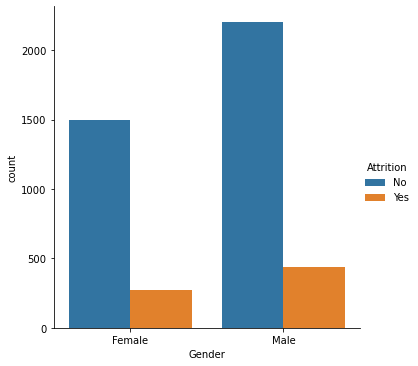

In [7]:
sns.catplot(x= 'Gender' , 
            hue = 'Attrition',
            kind = 'count',
            #aspect = 1.5,
            data=df)


Text(0, 0.5, 'Resign Percentage by Age')

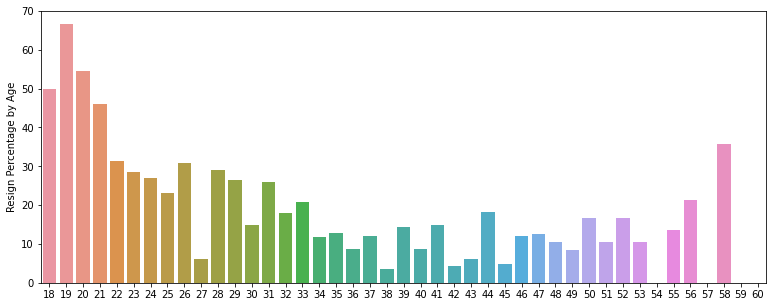

In [8]:
# ------------------find percentage for each age-------------------#

age_all = df['Age'].value_counts()
age_att = attrition['Age'].value_counts()
# empty list to store data in it 
age = []
percentage = []

for x in age_all.index: # x = age number
    if not x in age_att: # if there is no attrition than its 0%
        age.append(x) # age 
        percentage.append(0) #0%
    else:
        y = (age_att[x]/age_all[x])*100 # find percentage
        age.append(x) # age 
        percentage.append(y) # percentage
    
plt.figure(figsize=(13,5)) 
sns.barplot(x= age , 
            y = percentage)
plt.ylabel('Resign Percentage by Age')

Text(0.5, 1.0, 'Distribution of Ages, by Gender ')

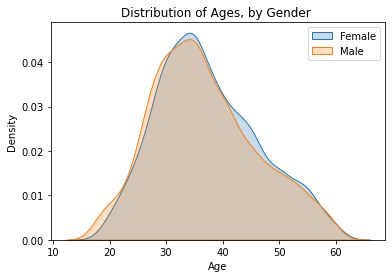

In [9]:
# filtering the data
female =  df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

sns.kdeplot(data=female['Age'], label="Female",color = '#1F77B4' ,shade=True)
sns.kdeplot(data=male['Age'], label="Male",color = '#FF7F0E', shade=True)

plt.legend()
plt.title("Distribution of Ages, by Gender ")


Text(0.5, 1.0, 'Distribution of Ages of employees who left the job')

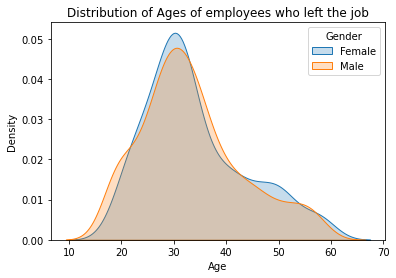

In [10]:
# filtering the data
female_att = female[female['Attrition']== 'Yes']
male_att = male[male['Attrition']== 'Yes']

sns.kdeplot(female_att['Age'], label="Female", shade=True)
sns.kdeplot(male_att['Age'], label="Male", shade=True)

plt.legend(title='Gender', loc='upper right')
plt.title('Distribution of Ages of employees who left the job')

Text(0.5, 6.79999999999999, 'Business Types')

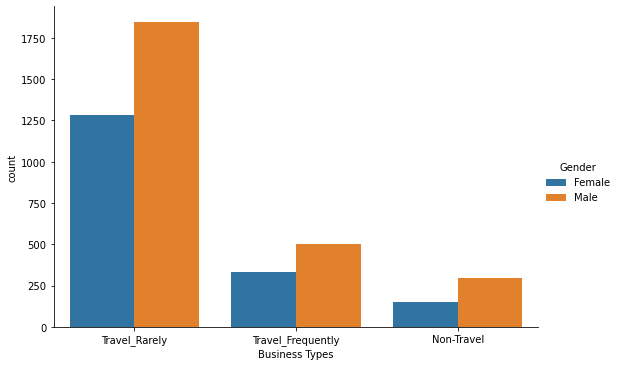

In [11]:
sns.catplot(x= 'BusinessTravel' , 
            hue = 'Gender',
            kind = 'count',
            aspect = 1.5,
            #palette = ['#FF7F0E', '#1F77B4'],
            data=df)
plt.xlabel('Business Types')

Text(0.5, 6.79999999999999, 'Department')

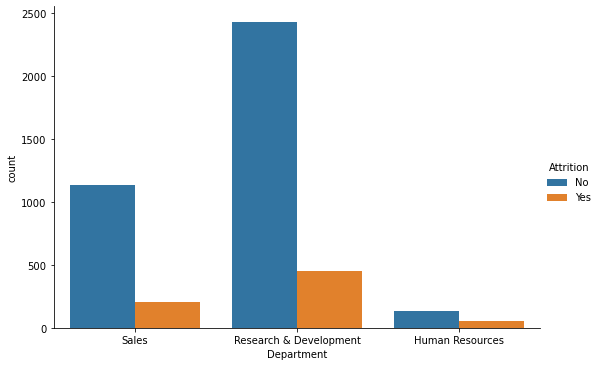

In [12]:
sns.catplot(x= 'Department' , 
            hue = 'Attrition',
            kind = 'count',
            aspect = 1.5,
            #palette = ['#FF7F0E', '#1F77B4'],
            data=df)
plt.xlabel('Department')

Text(0.5, 1.0, 'Distribution of distance from home')

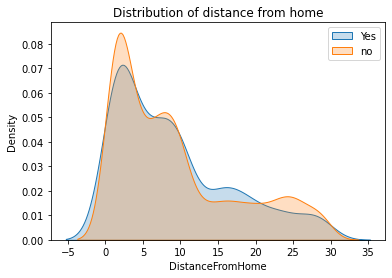

In [13]:
# filtering the data
att_y = df[df['Attrition']=='Yes']
att_n = df[df['Attrition']=='No']

sns.kdeplot(att_y['DistanceFromHome'],label="Yes", shade = True, )
sns.kdeplot(att_n['DistanceFromHome'], label="no" ,shade = True, )
plt.legend()
plt.title('Distribution of distance from home')

Text(10.969629629629637, 0.5, 'Number of Employee')

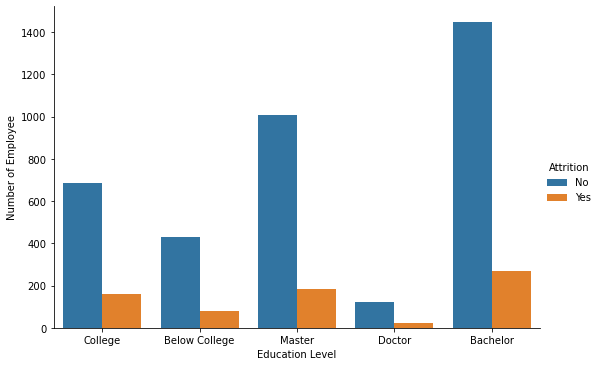

In [14]:
education = df.copy()
education['Education'].replace(to_replace=1, value='Below College', inplace=True)
education['Education'].replace(to_replace=2, value='College', inplace=True)
education['Education'].replace(to_replace=3, value='Bachelor', inplace=True)
education['Education'].replace(to_replace=4, value='Master', inplace=True)
education['Education'].replace(to_replace=5, value='Doctor', inplace=True)

sns.catplot(x= 'Education' , 
            hue = 'Attrition',
            kind = 'count',
            aspect = 1.5,
            #palette = ['#FF7F0E', '#1F77B4'],
            data=education)
plt.xlabel('Education Level')
plt.ylabel('Number of Employee')

Text(10.27469135802469, 0.5, 'Number of Employee')

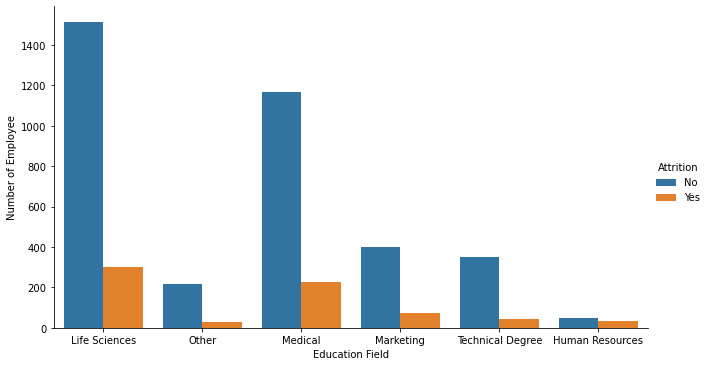

In [15]:
sns.catplot(x= 'EducationField' , 
            hue = 'Attrition',
            kind = 'count',
            aspect = 1.8,
            #palette = ['#FF7F0E', '#1F77B4'],
            data=df)
plt.xlabel('Education Field')
plt.ylabel('Number of Employee')

Text(12.935146604938268, 0.5, 'Number of Employee')

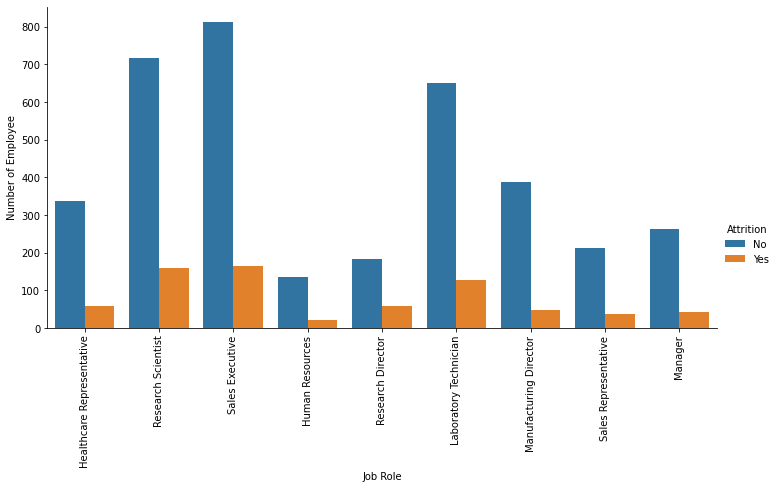

In [16]:
sns.catplot(x= 'JobRole' , 
            hue = 'Attrition',
            kind = 'count',
            #height=5, 
            aspect= 2,
            data=df)
plt.xticks(rotation = 90)
plt.xlabel('Job Role')
plt.ylabel('Number of Employee')


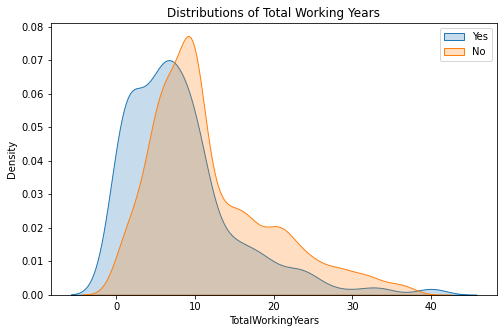

In [17]:
# filtering the data
att_y = df[df['Attrition']=='Yes']
att_n = df[df['Attrition']=='No']


plt.figure(figsize = (8,5))
sns.kdeplot(data=att_y['TotalWorkingYears'], label="Yes", shade=True)
sns.kdeplot(data=att_n['TotalWorkingYears'], label="No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

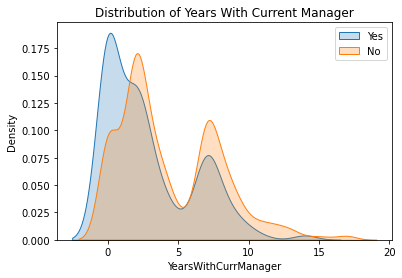

In [18]:
# filtering the data
att_y = df[df['Attrition']=='Yes']
att_n = df[df['Attrition']=='No']

sns.kdeplot(data=att_y['YearsWithCurrManager'], label="Yes", shade=True)
sns.kdeplot(data=att_n['YearsWithCurrManager'], label="No", shade=True)

plt.title('Distribution of Years With Current Manager')
plt.legend()
plt.show()

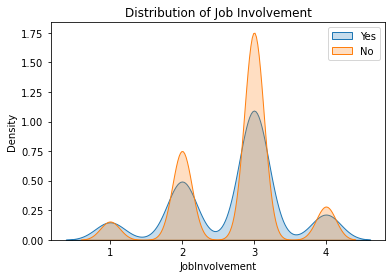

In [19]:
# filtering the data
att_y = df[df['Attrition']=='Yes']
att_n = df[df['Attrition']=='No']

sns.kdeplot(data=att_y['JobInvolvement'], label="Yes", shade=True)
sns.kdeplot(data=att_n['JobInvolvement'], label="No", shade=True)

plt.title('Distribution of Job Involvement')
plt.legend()
plt.show()

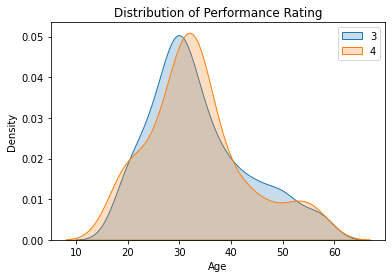

In [20]:
per_3 = attrition[attrition['PerformanceRating']==3]
per_4 = attrition[attrition['PerformanceRating']==4]

sns.kdeplot(data=per_3['Age'], label="3", shade=True)
sns.kdeplot(data=per_4['Age'], label="4", shade=True)

plt.title('Distribution of Performance Rating')
plt.legend()
plt.show()

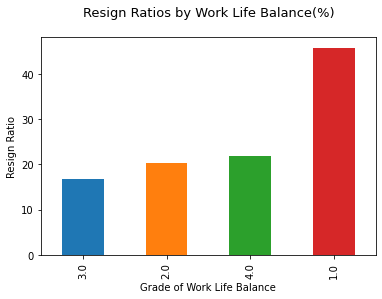

In [21]:
att_y = df[df['Attrition']=='Yes']
att_n = df[df['Attrition']=='No']

per = (att_y['WorkLifeBalance'].value_counts()/att_n['WorkLifeBalance'].value_counts())*100
per.plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'])

plt.xlabel('Grade of Work Life Balance')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Work Life Balance(%)\n', size = 13)
plt.show()

In [22]:
df = df.dropna()

# get dummies --> replace categorical data into numeric 
df.Attrition = pd.get_dummies(df.Attrition, drop_first = True)
df = pd.get_dummies(df)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis = 1) #feature matrix
y = df.Attrition # target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

# creating logistic regression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 59.94842503189409


In [23]:
model = model.best_estimator_.fit(X_train, y_train)

y_preds = model.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_preds))
print('Sensitivity:', metrics.recall_score(y_test, y_preds))

Accuracy: 0.8488372093023255
Sensitivity: 0.17266187050359713


#### Based on your understanding of sensitivity and specificity which algorithm would you pick based on the report in the blog?

Sensitivity ----> Predicting a bad customers or defaulters before issuing the loan 

Specificity ----> Testing a medicine is good or poisonous 

So, for our case Sensitivity would be more applicable than Specificity 